In [310]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Yearly changes

In [324]:
def got_fired_following_season(team):
    team_totals = df[df['Team'] == team]
    for line in open("yearly_changes_by_team2003.csv", "r"):
        if line.split(",")[0] == team:
            years = line.split(",")[1:]
            for year in years:
                year = year.strip()
                df.loc[(df['Team']== team) & (df['Year']== str(int(year) - 2)), 'LeavesNextYr'] = 1
    return df



def tenure(team):
    team_df = df[df['Team'] == team]
    year_min = team_df[team_df['LeavesNextYr'] == 1]
    years = year_min['Year'].tolist()
    if len(years) > 0: #The Bob Stoops exception
        
        years.sort()
        min_year = years[0]
        year = int(min_year)
        counter = 0
        while year <= 2015:
            if int(year) - 1 in map(int, years):
                counter = 1
                df.loc[(df['Year'] == str(year)) & (df['Team'] == team), 'Tenure'] = 0
            else:
                df.loc[(df['Year'] == str(year)) & (df['Team'] == team), 'Tenure'] = counter
                counter += 1
            year += 1
        
    return df

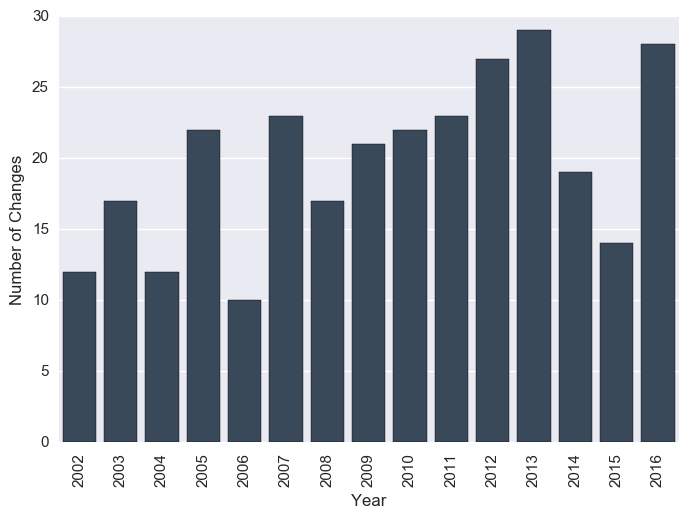

In [325]:
changes = pd.read_csv("~/Documents/310analytics/github/hot_seat_2016/yearly_turnover.csv")
df = pd.DataFrame(changes)

sns.set_context("notebook", font_scale=1.1)

yearly_plot=sns.barplot(x='Year', y='Number of Changes', data=df, color="#34495e")

yearly_plot.set_ylabel("Number of Changes")

for item in yearly_plot.get_xticklabels():
    item.set_rotation(90)
plt.show()

In [326]:
import glob

columns = ["Team","Wins","Losses","Ties","Games","WinPct", "Year"]

df = pd.DataFrame(columns=columns)


for filename in glob.glob("2*records.csv"):
    year = filename.split("_")[0]
    f = DataFrame.from_csv(filename, header = None, index_col=False)
    f['Year'] = year
    f.columns = columns
    dfs = [df, f]
    df = pd.concat(dfs)
df = df.reset_index()
del df['index']


df['LeavesNextYr'] = 0
df['Tenure'] = 0
    


In [327]:
teams = df['Team'].unique()

for team in teams:
    df = got_fired_following_season(team)
    tenure(team)

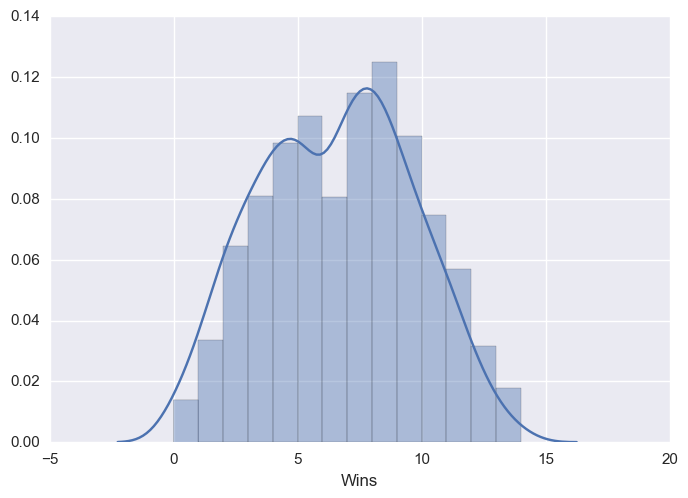

In [340]:
sns.distplot(df['Wins'], bins = 14)

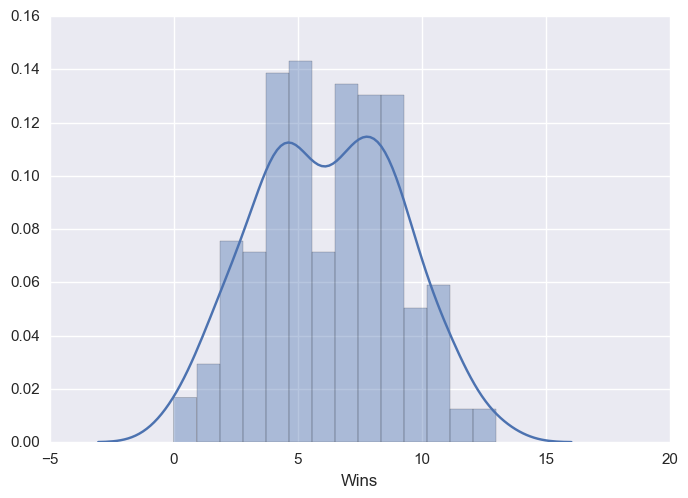

In [339]:
canned = df[df['LeavesNextYr'] == 1]
sns.distplot(canned['Wins'], bins = 14)

In [331]:
df[df['Team'] == "UCLA"]

,Team,Wins,Losses,Ties,Games,WinPct,Year,LeavesNextYr,Tenure
66,UCLA,6.0,7.0,0.0,13.0,0.46154,2003,0,0
171,UCLA,6.0,6.0,0.0,12.0,0.50000,2004,0,0
242,UCLA,10.0,2.0,0.0,12.0,0.83333,2005,0,0
404,UCLA,7.0,6.0,0.0,13.0,0.53846,2006,1,0
540,UCLA,6.0,7.0,0.0,13.0,0.46154,2007,0,0
681,UCLA,4.0,8.0,0.0,12.0,0.33333,2008,0,1
767,UCLA,7.0,6.0,0.0,13.0,0.53846,2009,0,2
919,UCLA,4.0,8.0,0.0,12.0,0.33333,2010,1,3
1029,UCLA,6.0,8.0,0.0,14.0,0.42857,2011,0,0
1115,UCLA,9.0,5.0,0.0,14.0,0.64286,2012,0,1


In [332]:
len(teams)

131